<h2 id="70-単語ベクトルの和による特徴量">70. 単語ベクトルの和による特徴量</h2>
<p>問題50で構築した学習データ，検証データ，評価データを行列・ベクトルに変換したい．例えば，学習データについて，すべての事例\(x_i\)の特徴ベクトル\(\boldsymbol{x}_i\)を並べた行列\(X\)と，正解ラベルを並べた行列（ベクトル）\(Y\)を作成したい．</p>

<p>\[X = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \dots \\ 
  \boldsymbol{x}_n \\ 
\end{pmatrix} \in \mathbb{R}^{n \times d},
Y = \begin{pmatrix} 
  y_1 \\ 
  y_2 \\ 
  \dots \\ 
  y_n \\ 
\end{pmatrix} \in \mathbb{N}^{n}}\]</p>

<p>ここで，\(n\)は学習データの事例数であり，\(\boldsymbol{x}_i \in \mathbb{R}^d\)と\(y_i \in \mathbb{N}\)はそれぞれ，\(i \in \{1, \dots, n\}\)番目の事例の特徴量ベクトルと正解ラベルを表す．
なお，今回は「ビジネス」「科学技術」「エンターテイメント」「健康」の4カテゴリ分類である．\(\mathbb{N}_{&lt;4}\)で\(4\)未満の自然数（\(0\)を含む）を表すことにすれば，任意の事例の正解ラベル\(y_i\)は\(y_i \in \mathbb{N}_{&lt;4}\)で表現できる．
以降では，ラベルの種類数を\(L\)で表す（今回の分類タスクでは\(L=4\)である）．</p>
<p>\(i\)番目の事例の特徴ベクトル\(\boldsymbol{x}_i\)は，次式で求める．</p>

<p>\[\boldsymbol{x}_i = \frac{1}{T_i} \sum_{t=1}^{T_i} \mathrm{emb}(w_{i,t}))\]</p>

<p>ここで，\(i\)番目の事例は\(T_i\)個の（記事見出しの）単語列\((w_{i,1}, w_{i,2}, \dots, w_{i,T_i})\)から構成され，\(\mathrm{emb}(w) \in \mathbb{R}^d\)は単語\(w\)に対応する単語ベクトル（次元数は\(d\)）である．すなわち，\(i\)番目の事例の記事見出しを，その見出しに含まれる単語のベクトルの平均で表現したものが\(\boldsymbol{x}_i\)である．今回は単語ベクトルとして，問題60でダウンロードしたものを用いればよい．\(300\)次元の単語ベクトルを用いたので，\(d=300\)である．</p>
<p>\(i\)番目の事例のラベル\(y_i\)は，次のように定義する．</p>

<p>\[y_i = \begin{cases}
0 &amp; (\mbox{記事}x_i\mbox{が「ビジネス」カテゴリの場合}) \\
1 &amp; (\mbox{記事}x_i\mbox{が「科学技術」カテゴリの場合}) \\
2 &amp; (\mbox{記事}x_i\mbox{が「エンターテイメント」カテゴリの場合}) \\
3 &amp; (\mbox{記事}x_i\mbox{が「健康」カテゴリの場合}) \\
\end{cases}}\]</p>

<p>なお，カテゴリ名とラベルの番号が一対一で対応付いていれば，上式の通りの対応付けでなくてもよい．</p>
<p>以上の仕様に基づき，以下の行列・ベクトルを作成し，ファイルに保存せよ．</p>
<ul>
<li>学習データの特徴量行列: \(X_{\rm train} \in \mathbb{R}^{N_t \times d}\)</li>
<li>学習データのラベルベクトル: \(Y_{\rm train} \in \mathbb{N}^{N_t}\)</li>
<li>検証データの特徴量行列: \(X_{\rm valid} \in \mathbb{R}^{N_v \times d}\)</li>
<li>検証データのラベルベクトル: \(Y_{\rm valid} \in \mathbb{N}^{N_v}\)</li>
<li>評価データの特徴量行列: \(X_{\rm test} \in \mathbb{R}^{N_e \times d}\)</li>
<li>評価データのラベルベクトル: \(Y_{\rm test} \in \mathbb{N}^{N_e}\)</li>
</ul>
<p>なお，\(N_t, N_v, N_e\)はそれぞれ，学習データの事例数，検証データの事例数，評価データの事例数である．</p>


In [5]:
# !cp /Users/nyuton/Documents/100knock-2023/trainee_nyutonn/chapter06/data/NewsAggregatorDataset.zip /Users/nyuton/Documents/100knock-2023/trainee_nyutonn/chapter08/data/NewsAggregatorDataset.zip 

ここから問題50からのコピペ

In [5]:
# !unzip /Users/nyuton/Documents/100knock-2023/trainee_nyutonn/chapter08/data/NewsAggregatorDataset.zip

Archive:  /Users/nyuton/Documents/100knock-2023/trainee_nyutonn/chapter08/data/NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [2]:
# データ分割
import pandas as pd
# csvファイルを読み込む
path = "/Users/nyuton/Documents/100knock-2023/trainee_nyutonn/chapter08/data/newsCorpora.csv"
df = pd.read_table(path, header=None, sep='\\t', engine='python')
df.columns = ['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP']
# 先頭5つ表示
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [3]:
# PUBLISHERが特定の行のみを取り出す
publishers = ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']
daily_mails = df[df['PUBLISHER'].isin(publishers)]
len(daily_mails)  # 取り出した行数

13356

In [4]:
from sklearn.model_selection import train_test_split
# 訓練データ、検証データ、テストデータに分ける
# stratifyで偏りを減らしてみる
train_data, non_train, train_target, non_train_target = train_test_split(daily_mails[['TITLE', 'CATEGORY']], daily_mails['CATEGORY'], train_size=0.8, random_state=10, stratify=daily_mails['CATEGORY'])
valid_data, test_data, valid_target, test_target = train_test_split(non_train, non_train_target, train_size=0.5, random_state=10,  stratify=non_train_target)
print(len(train_data), len(valid_data), len(test_data))

# テキストファイルに書き込む
train_data.to_csv('work/train.txt', header=None, index=None, sep='\t')
valid_data.to_csv('work/valid.txt', header=None, index=None, sep='\t')
test_data.to_csv('work/test.txt', header=None, index=None, sep='\t')

10684 1336 1336


ここからラベルと特徴量の変換をする
* 特徴量 X：テキスト -> 単語ベクトルの平均
* ラベル y：b, e, m, t -> 0, 1, 2, 3

In [10]:
# テキストとラベルの抽出
def extract_text_label(path):
    X_text = []
    y_label = []
    with open(path, "r") as fr:
        for line in fr:
            line = line.rstrip()
            text, label = line.split("\t")
            X_text.append(text)
            y_label.append(label)
    return X_text, y_label
        

X_train_text, y_train_label = extract_text_label("work/train.txt")
X_valid_text, y_valid_label = extract_text_label("work/valid.txt")
X_test_text, y_test_label = extract_text_label("work/test.txt")
print(len(X_train_text), len(y_train_label))

10684 10684


In [11]:
# ラベルをindexに変更
def label2index(label):
    if label == "b":
        return 0
    elif label == "e":
        return 1
    elif label == "t":
        return 2
    elif label == "m":
        return 3

y_train = list(map(label2index, y_train_label))
y_valid = list(map(label2index, y_valid_label))
y_test = list(map(label2index, y_test_label))

In [14]:
# めちゃめちゃ時間かかるので注意！ -> 次元数と語彙数を勘違いしていたので修正したら一瞬で終わった
import numpy as np
from tqdm import tqdm # 進捗表示
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin', binary=True) 

# 特徴量をテキストから単語ベクトルの平均に変換
def text2emb_vec(X, output_path):
    emb_vecs = []
    for x in tqdm(X): # 経過時間の表示
        words = x.split(" ") # 単語に分割
        sum_vec = np.zeros(300) # 初期化
        for word in words:
            # 辞書に単語が載っていないとエラーになるので，載っていないときは無視する
            if word in model:
                sum_vec += model[word] # 単語ベクトルを足していく
        ave_vec = sum_vec / len(words) # 平均にする
        emb_vecs.append(ave_vec) 
    
    np.save(output_path, emb_vecs) # 特徴量をファイルに保存する

X_train = text2emb_vec(X_train_text, "work/train_wordemb.npy")
X_valid = text2emb_vec(X_valid_text, "work/valid_wordemb.npy")
X_test = text2emb_vec(X_test_text, "work/test_wordemb.npy")

100%|██████████| 1336/1336 [00:00<00:00, 54192.28it/s]


<h2 id="71-単層ニューラルネットワークによる予測">71. 単層ニューラルネットワークによる予測</h2>
<p>問題70で保存した行列を読み込み，学習データについて以下の計算を実行せよ．</p>

<p>\[\hat{\boldsymbol{y}}_1 = {\rm softmax}(\boldsymbol{x}_1 W), \\
\hat{Y} = {\rm softmax}(X_{[1:4]} W))\]</p>

<p>ただし，\({\rm softmax}\)はソフトマックス関数，\(X_{[1:4]} \in \mathbb{R}^{4 \times d}\)は特徴ベクトル\(\boldsymbol{x}_1, \boldsymbol{x}_2, \boldsymbol{x}_3, \boldsymbol{x}_4\)を縦に並べた行列である．</p>

<p>\[X_{[1:4]} = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \boldsymbol{x}_3 \\ 
  \boldsymbol{x}_4 \\ 
\end{pmatrix}}\]</p>

<p>行列\(W \in \mathbb{R}^{d \times L}\)は単層ニューラルネットワークの重み行列で，ここではランダムな値で初期化すればよい（問題73以降で学習して求める）．なお，\(\hat{\boldsymbol{y}}_1 \in \mathbb{R}^L\)は未学習の行列\(W\)で事例\(x_1\)を分類したときに，各カテゴリに属する確率を表すベクトルである．
同様に，\(\hat{Y} \in \mathbb{R}^{n \times L}\)は，学習データの事例\(x_1, x_2, x_3, x_4\)について，各カテゴリに属する確率を行列として表現している．</p>


ここから吉田くんのを参考にした

In [19]:
import numpy as np
import re
import torch
import torch.nn as nn

from gensim.models import KeyedVectors

In [58]:
# データの準備
X_train = torch.from_numpy(np.load('./work/train.text.npy').astype(np.float32))
y_train = torch.from_numpy(np.load('./work/train.label.npy').astype(np.int64))
X_valid = torch.from_numpy(np.load('./work/valid.text.npy').astype(np.float32))
y_valid = torch.from_numpy(np.load('./work/valid.label.npy').astype(np.int64))
X_test = torch.from_numpy(np.load('./work/test.text.npy').astype(np.float32))
y_test = torch.from_numpy(np.load('./work/test.label.npy').astype(np.int64))

In [54]:
print(X_train.size(), y_train.size())
print(X_valid.size(), y_valid.size())
print(X_test.size(), y_test.size())

torch.Size([10684, 300]) torch.Size([10684])
torch.Size([1336, 300]) torch.Size([1336])
torch.Size([1336, 300]) torch.Size([1336])


In [55]:
class SoftmaxLayer(nn.Module):
    def __init__(self, n_features, n_labels):
        super().__init__() # 親クラスの nn.Module の初期化
        self.func = nn.Linear(n_features, n_labels, bias=False) # 線形層
    
    def forward(self, x):
        return self.func(x)

In [56]:
model = SoftmaxLayer(300, 4)
# y1
y1_hat = nn.Softmax(model(X_train[0]))
print(y1_hat)

# y1_4
Y_hat_1_4 = nn.Softmax(model(X_train[:4]))
print(Y_hat_1_4)

Softmax(dim=tensor([0.0089, 0.0224, 0.0071, 0.0437], grad_fn=<SqueezeBackward4>))
Softmax(
  dim=tensor([[ 0.0089,  0.0224,  0.0071,  0.0437],
          [-0.0010,  0.0291,  0.0009,  0.0257],
          [-0.0082, -0.0005,  0.0314, -0.0164],
          [-0.0133,  0.0205, -0.0051,  0.0312]], grad_fn=<MmBackward0>)
)


<h2 id="72-損失と勾配の計算">72. 損失と勾配の計算</h2>
<p>学習データの事例\(x_1\)と事例集合\(x_1, x_2, x_3, x_4\)に対して，クロスエントロピー損失と，行列\(W\)に対する勾配を計算せよ．なお，ある事例\(x_i\)に対して損失は次式で計算される．</p>

<p>\[l_i = - \log [\mbox{事例}x_i\mbox{が}y_i\mbox{に分類される確率}]]\]</p>

<p>ただし，事例集合に対するクロスエントロピー損失は，その集合に含まれる各事例の損失の平均とする．</p>


In [61]:
softmax_layer = SoftmaxLayer(300, 4)
loss_func = nn.CrossEntropyLoss()

loss_x1 = loss_func(softmax_layer(X_train[0]), y_train[0])
softmax_layer.zero_grad()
loss_x1.backward()
print(loss_x1)
print(softmax_layer.func.weight.grad)

loss_x1_4 = loss_func(softmax_layer(X_train[:4]), y_train[:4])
softmax_layer.zero_grad()
loss_x1_4.backward()
print(loss_x1_4)
print(softmax_layer.func.weight.grad)

tensor(1.4279, grad_fn=<NllLossBackward0>)
tensor([[ 0.0393,  0.0340,  0.0090,  ..., -0.0680, -0.0640,  0.0561],
        [-0.0128, -0.0111, -0.0029,  ...,  0.0222,  0.0209, -0.0183],
        [-0.0133, -0.0115, -0.0031,  ...,  0.0230,  0.0216, -0.0190],
        [-0.0132, -0.0114, -0.0030,  ...,  0.0228,  0.0215, -0.0188]])
tensor(1.4101, grad_fn=<NllLossBackward0>)
tensor([[ 0.0161, -0.0021,  0.0013,  ..., -0.0545, -0.0406, -0.0036],
        [-0.0103,  0.0085, -0.0125,  ...,  0.0231,  0.0038,  0.0004],
        [-0.0029, -0.0032,  0.0058,  ...,  0.0159,  0.0187,  0.0017],
        [-0.0029, -0.0031,  0.0054,  ...,  0.0155,  0.0180,  0.0014]])


<h2 id="73-確率的勾配降下法による学習">73. 確率的勾配降下法による学習</h2>
<p>確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，行列\(W\)を学習せよ．なお，学習は適当な基準で終了させればよい（例えば「100エポックで終了」など）．</p>


In [94]:
import torch.optim as optim
from tqdm import tqdm

def train(model, output_path, total_epochs):
    model.train() # 訓練モードに切り替え
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    loss_func = nn.CrossEntropyLoss()

    # 指定した epoch 数だけ学習
    for epoch in range(total_epochs):
        total_loss = 0.
        # パラメータ更新
        for x, y in zip(X_train, y_train):
            loss = loss_func(model(x), y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        # 平均ロスの表示
        ave_loss = total_loss / len(X_train)
        print(f"epoch{epoch}: ave_loss = {ave_loss}")
    # パラメータを保存
    torch.save(model.state_dict(), output_path)

model = SoftmaxLayer(300, 4)
output_path = "./trained_param.npz"
total_epochs = 20
train(model, output_path, total_epochs)

epoch0: ave_loss = 0.7591903258218959
epoch1: ave_loss = 0.532180206832748
epoch2: ave_loss = 0.46145106277897097
epoch3: ave_loss = 0.4222415633409464
epoch4: ave_loss = 0.39685263108946234
epoch5: ave_loss = 0.3788402500095952
epoch6: ave_loss = 0.3652537762081542
epoch7: ave_loss = 0.35454699671000545
epoch8: ave_loss = 0.3458289770311536
epoch9: ave_loss = 0.3385484221889777
epoch10: ave_loss = 0.3323449262367399
epoch11: ave_loss = 0.3269722025030979
epoch12: ave_loss = 0.32225584691791365
epoch13: ave_loss = 0.31806854287915626
epoch14: ave_loss = 0.31431507473593323
epoch15: ave_loss = 0.31092255603704394
epoch16: ave_loss = 0.3078342294888058
epoch17: ave_loss = 0.3050051564952231
epoch18: ave_loss = 0.3023992426661914
epoch19: ave_loss = 0.29998718398577745


<h2 id="74-正解率の計測">74. 正解率の計測</h2>
<p>問題73で求めた行列を用いて学習データおよび評価データの事例を分類したとき，その正解率をそれぞれ求めよ．</p>


In [93]:
from sklearn.metrics import accuracy_score

def calc_acc(model, X, y):
    model.eval() # 推論モード
    y_pred =torch.argmax(model(X), dim=1)
    acc = accuracy_score(y, y_pred)
    return acc

# パラメータをロード
model = SoftmaxLayer(300, 4)
model.load_state_dict(torch.load('./trained_param.npz'))

train_acc = calc_acc(model, X_train, y_train)
test_acc = calc_acc(model, X_test, y_test)
print(f"train_acc = {train_acc}")
print(f"test_acc  = {test_acc}")

train_acc = 0.9016286035192812
test_acc  = 0.8914670658682635


<h2 id="75-損失と正解率のプロット">75. 損失と正解率のプロット</h2>
<p>問題73のコードを改変し，各エポックのパラメータ更新が完了するたびに，訓練データでの損失，正解率，検証データでの損失，正解率をグラフにプロットし，学習の進捗状況を確認できるようにせよ．</p>


In [137]:
def calc_acc_loss(model, X, y):
    model.eval() # 推論モード
    # acc
    y_pred =torch.argmax(model(X), dim=1)
    acc = accuracy_score(y, y_pred)
    # loss
    loss_func = nn.CrossEntropyLoss()
    total_loss = 0.
    with torch.no_grad():
        for xi, yi in zip(X, y):
            loss = loss_func(model(xi), yi)
            total_loss += loss
        ave_loss = total_loss / len(X)
        
    return acc, ave_loss

# 本文
def train(model, output_path, total_epochs):
    model.train() # 訓練モード
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    loss_func = nn.CrossEntropyLoss()
    train_log = []
    valid_log = []

    # 指定した epoch 数だけ学習
    for epoch in range(total_epochs):
        total_loss = 0.
        # パラメータ更新
        for x, y in zip(X_train, y_train):
            loss = loss_func(model(x), y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        # 平均ロスの表示
        ave_loss = total_loss / len(X_train)
        print(f"epoch{epoch}: ave_loss = {ave_loss}")
        # 正解率とロスを保存
        train_log.append(calc_acc_loss(model, X_train, y_train))
        valid_log.append(calc_acc_loss(model, X_valid, y_valid))
    # パラメータを保存
    torch.save(model.state_dict(), output_path)
    return train_log, valid_log

model = SoftmaxLayer(300, 4)
train_log, valid_log = train(model, "trained_param.npz", 20)

epoch0: ave_loss = 0.7579713742840074
epoch1: ave_loss = 0.5317580335806783
epoch2: ave_loss = 0.461304489431023
epoch3: ave_loss = 0.4221917198358077
epoch4: ave_loss = 0.3968412893865366
epoch5: ave_loss = 0.3788440667343826
epoch6: ave_loss = 0.365262324577469
epoch7: ave_loss = 0.35455546530285187
epoch8: ave_loss = 0.34583514365441576
epoch9: ave_loss = 0.3385513988867434
epoch10: ave_loss = 0.3323444900209156
epoch11: ave_loss = 0.3269684764664802
epoch12: ave_loss = 0.3222490623954088
epoch13: ave_loss = 0.3180589977436503
epoch14: ave_loss = 0.31430305039422074
epoch15: ave_loss = 0.3109083932849873
epoch16: ave_loss = 0.3078182337117436
epoch17: ave_loss = 0.3049876033051955
epoch18: ave_loss = 0.3023804581980131
epoch19: ave_loss = 0.2999673482362269


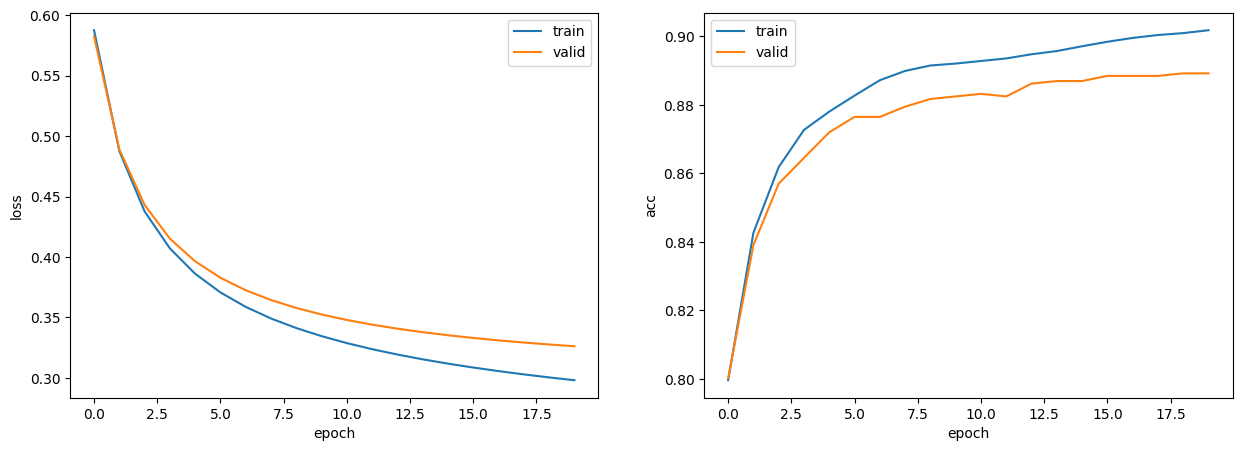

In [138]:
# 表示
import matplotlib.pyplot as plt

train_acc, train_loss = zip(*train_log)
valid_acc, valid_loss = zip(*valid_log)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(train_loss, label='train')
ax[0].plot(valid_loss, label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(train_acc, label='train')
ax[1].plot(valid_acc, label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[1].legend()

plt.show()

<h2 id="76-チェックポイント">76. チェックポイント</h2>
<p>問題75のコードを改変し，各エポックのパラメータ更新が完了するたびに，チェックポイント（学習途中のパラメータ（重み行列など）の値や最適化アルゴリズムの内部状態）をファイルに書き出せ．</p>


In [114]:
def calc_acc_loss(model, X, y):
    model.eval() # 推論モード
    # acc
    y_pred =torch.argmax(model(X), dim=1)
    acc = accuracy_score(y, y_pred)
    # loss
    loss_func = nn.CrossEntropyLoss()
    total_loss = 0.
    with torch.no_grad():
        for xi, yi in zip(X, y):
            loss = loss_func(model(xi), yi)
            total_loss += loss
        ave_loss = total_loss / len(X)
        
    return acc, ave_loss

# 本文
def train(model, total_epochs):
    model.train() # 訓練モード
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    loss_func = nn.CrossEntropyLoss()
    train_log = []
    valid_log = []

    # 指定した epoch 数だけ学習
    for epoch in range(total_epochs):
        total_loss = 0.
        # パラメータ更新
        for x, y in zip(X_train, y_train):
            loss = loss_func(model(x), y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        # 平均ロスの表示
        ave_loss = total_loss / len(X_train)
        print(f"epoch{epoch}: ave_loss = {ave_loss}")
        # 正解率とロスを保存
        train_log.append(calc_acc_loss(model, X_train, y_train))
        valid_log.append(calc_acc_loss(model, X_valid, y_valid))
        # パラメータを毎回保存
        torch.save(model.state_dict(), f"./pytorch_param/param{epoch}.npz")
    return train_log, valid_log

model = SoftmaxLayer(300, 4)
train_log, valid_log = train(model, 20)

epoch0: ave_loss = 0.759847640740249
epoch1: ave_loss = 0.53215204002099
epoch2: ave_loss = 0.4614653711232888
epoch3: ave_loss = 0.4222677219669115
epoch4: ave_loss = 0.39687932620322264
epoch5: ave_loss = 0.3788627272402859
epoch6: ave_loss = 0.3652700761520534
epoch7: ave_loss = 0.3545565539634566
epoch8: ave_loss = 0.3458319283798454
epoch9: ave_loss = 0.3385452722692726
epoch10: ave_loss = 0.33233626547482964
epoch11: ave_loss = 0.3269587172323515
epoch12: ave_loss = 0.3222381622509968
epoch13: ave_loss = 0.318047241537917
epoch14: ave_loss = 0.3142906598831786
epoch15: ave_loss = 0.31089550745087063
epoch16: ave_loss = 0.3078049793042648
epoch17: ave_loss = 0.30497412136909696
epoch18: ave_loss = 0.30236678718831
epoch19: ave_loss = 0.2999535990680814


<h2 id="77-ミニバッチ化">77. ミニバッチ化</h2>
<p>問題76のコードを改変し，\(B\)事例ごとに損失・勾配を計算し，行列\(W\)の値を更新せよ（ミニバッチ化）．\(B\)の値を\(1, 2, 4, 8, \dots\)と変化させながら，1エポックの学習に要する時間を比較せよ．</p>


In [146]:
from time import time

# バッチサイズを追加
def train(model, batch_size, total_epochs): # 引数にバッチサイズを追加
    model.train() # 訓練モード
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    loss_func = nn.CrossEntropyLoss()
    train_log = []
    valid_log = []

    print(f"batch_size: {batch_size}")

    # 指定した epoch 数だけ学習
    for epoch in range(total_epochs):
        total_loss = 0.
        # パラメータ更新 (バッチ化)
        for x_batch, y_batch in zip(torch.split(X_train, batch_size), torch.split(y_train, batch_size)):
            loss = loss_func(model(x_batch), y_batch) # バッチ毎にロスを計算
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        # 平均ロスの表示
        ave_loss = total_loss / len(X_train)
        print(f"epoch{epoch}: ave_loss = {ave_loss}")
        # 正解率とロスを保存
        train_log.append(calc_acc_loss(model, X_train, y_train))
        valid_log.append(calc_acc_loss(model, X_valid, y_valid))
        # パラメータを毎回保存
        torch.save(model.state_dict(), f"./pytorch_param/param{epoch}.npz")
    return train_log, valid_log

# バッチサイズを変更して訓練時間を計測
elapsed_time_list = []
batch_list = [1, 2, 4, 8, 16, 32, 64]
train_log_batch = []
valid_log_batch = []
for batch_size in batch_list:
    start_time = time()
    model = SoftmaxLayer(300, 4)
    train_log, valid_log = train(model, batch_size=batch_size, total_epochs=10)
    train_log_batch.append(train_log[-1])
    valid_log_batch.append(valid_log[-1])
    elapsed_time_list.append(time() - start_time)

batch_size: 1
epoch0: ave_loss = 0.7596220030757563
epoch1: ave_loss = 0.5320190983186327
epoch2: ave_loss = 0.46138462952992215
epoch3: ave_loss = 0.42224067686397765
epoch4: ave_loss = 0.3968855639954365
epoch5: ave_loss = 0.3788892993821352
epoch6: ave_loss = 0.36530980056366835
epoch7: ave_loss = 0.3546053356395229
epoch8: ave_loss = 0.3458871875555192
epoch9: ave_loss = 0.3386053117832967
batch_size: 2
epoch0: ave_loss = 0.4380834930709231
epoch1: ave_loss = 0.31839397924407226
epoch2: ave_loss = 0.277642682457091
epoch3: ave_loss = 0.2532513884473411
epoch4: ave_loss = 0.23649147121948866
epoch5: ave_loss = 0.22414083670558374
epoch6: ave_loss = 0.21461094434257844
epoch7: ave_loss = 0.20700312827012984
epoch8: ave_loss = 0.20076641487364644
epoch9: ave_loss = 0.195543491365598
batch_size: 4
epoch0: ave_loss = 0.24935114145200826
epoch1: ave_loss = 0.18845844999351827
epoch2: ave_loss = 0.16605263246688468
epoch3: ave_loss = 0.1523225406984663
epoch4: ave_loss = 0.142549666943246

In [134]:
# batch_size 時間変化
for elapsed_time, batch_size in zip(elapsed_time_list, batch_list):
    print(f"batch_size: {batch_size}, elapsed_time: {elapsed_time}")

batch_size: 1, elapsed_time: 10.223589181900024
batch_size: 2, elapsed_time: 7.034456729888916
batch_size: 4, elapsed_time: 4.1039581298828125
batch_size: 8, elapsed_time: 3.1405019760131836
batch_size: 16, elapsed_time: 2.442925214767456
batch_size: 32, elapsed_time: 2.1095662117004395
batch_size: 64, elapsed_time: 1.9227159023284912


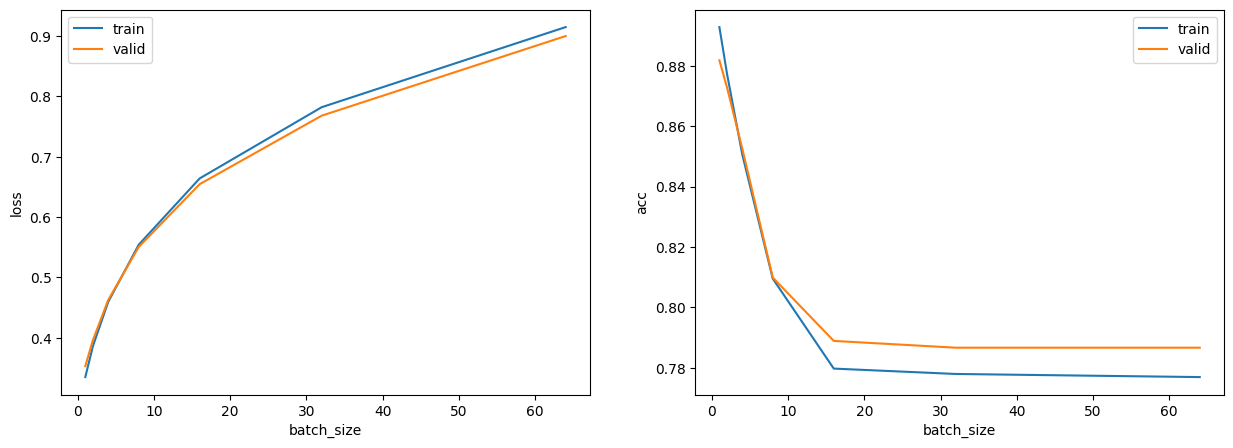

In [150]:
# 表示 batch_size 毎の ACC を表示
# batch_sizeが小さい方が圧倒的にACCが高くなるっぽ
import matplotlib.pyplot as plt

train_acc, train_loss = zip(*train_log_batch)
valid_acc, valid_loss = zip(*valid_log_batch)
batch_list = [1, 2, 4, 8, 16, 32, 64]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(batch_list, train_loss, label='train')
ax[0].plot(batch_list, valid_loss, label='valid')
ax[0].set_xlabel('batch_size')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(batch_list, train_acc, label='train')
ax[1].plot(batch_list, valid_acc, label='valid')
ax[1].set_xlabel('batch_size')
ax[1].set_ylabel('acc')
ax[1].legend()

plt.show()

<h2 id="78-gpu上での学習">78. GPU上での学習</h2>
<p>問題77のコードを改変し，GPU上で学習を実行せよ．</p>


In [127]:
from torch.cuda import is_available
device = 'cuda' if is_available() else 'cpu'
X_train2 = X_train.to(device)

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [155]:
from time import time
from torch.cuda import is_available

def calc_acc_loss(model, X, y, device='cpu'):
    model.to(device)
    X = X.to(device)
    model.eval() # 推論モード
    

    with torch.no_grad():
        # acc
        y_pred =torch.argmax(model(X), dim=1)
        y_pred = y_pred.to('cpu')
        acc = accuracy_score(y, y_pred)
        # loss
        loss_func = nn.CrossEntropyLoss()
        total_loss = 0.
        
        for xi, yi in zip(X, y):
            xi = xi.to(device)
            yi = yi.to(device)
            loss = loss_func(model(xi), yi)
            total_loss += loss
        ave_loss = total_loss / len(X)
        
    return acc, ave_loss

# バッチサイズを追加
def train(model, batch_size, total_epochs): # 引数にバッチサイズを追加
    model.train() # 訓練モード
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    loss_func = nn.CrossEntropyLoss()
    train_log = []
    valid_log = []

    # GPUでCUDAを使用
    device = 'cuda' if is_available() else 'cpu'
    model = model.to(device)
#     X_train.to(device)
#     y_train.to(device)

    print(f"batch_size: {batch_size}")

    # 指定した epoch 数だけ学習
    for epoch in range(total_epochs):
        total_loss = 0.
        # パラメータ更新 (バッチ化)
        for x_batch, y_batch in zip(torch.split(X_train, batch_size), torch.split(y_train, batch_size)):
            # GPU用に変換
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            device = 'cuda' if is_available() else 'cpu'
            model = model.to(device) # ここを外すとエラーになる
            
            loss = loss_func(model(x_batch), y_batch) # バッチ毎にロスを計算
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        # 平均ロスの表示
        ave_loss = total_loss / len(X_train)
        print(f"epoch{epoch}: ave_loss = {ave_loss}")
        # 正解率とロスを保存
        train_log.append(calc_acc_loss(model, X_train, y_train, device))
        valid_log.append(calc_acc_loss(model, X_valid, y_valid, device))
        # パラメータを毎回保存
        torch.save(model.state_dict(), f"./pytorch_param/param{epoch}.npz")
    return train_log, valid_log

# 時間計測
start_time = time()
model = SoftmaxLayer(300, 4)
train_log, valid_log = train(model, batch_size=16, total_epochs=100)
elapsed_time = time() - start_time

if is_available():
    print('GPU CUDA')
else:
    print('CPU')
print(f"elapsed_time: {elapsed_time}")

# CPUより時間が8倍ほどかかっている...

batch_size: 16
epoch0: ave_loss = 0.07674165356810822
epoch1: ave_loss = 0.06398807541344863
epoch2: ave_loss = 0.05744231594653221
epoch3: ave_loss = 0.053290394368086
epoch4: ave_loss = 0.05031454440405734
epoch5: ave_loss = 0.04801409479296194
epoch6: ave_loss = 0.046146899863424844
epoch7: ave_loss = 0.044580515740472074
epoch8: ave_loss = 0.04323508006631101
epoch9: ave_loss = 0.04205867529015825
epoch10: ave_loss = 0.04101560059662884
epoch11: ave_loss = 0.04008026019530946
epoch12: ave_loss = 0.03923370578831521
epoch13: ave_loss = 0.03846154715384673
epoch14: ave_loss = 0.03775262242257706
epoch15: ave_loss = 0.037098110768175534
epoch16: ave_loss = 0.036490926932570014
epoch17: ave_loss = 0.03592529485245538
epoch18: ave_loss = 0.035396447129762386
epoch19: ave_loss = 0.034900402385938126
epoch20: ave_loss = 0.03443379575775072
epoch21: ave_loss = 0.033993762575762185
epoch22: ave_loss = 0.033577839705503106
epoch23: ave_loss = 0.033183890833156426
epoch24: ave_loss = 0.032810

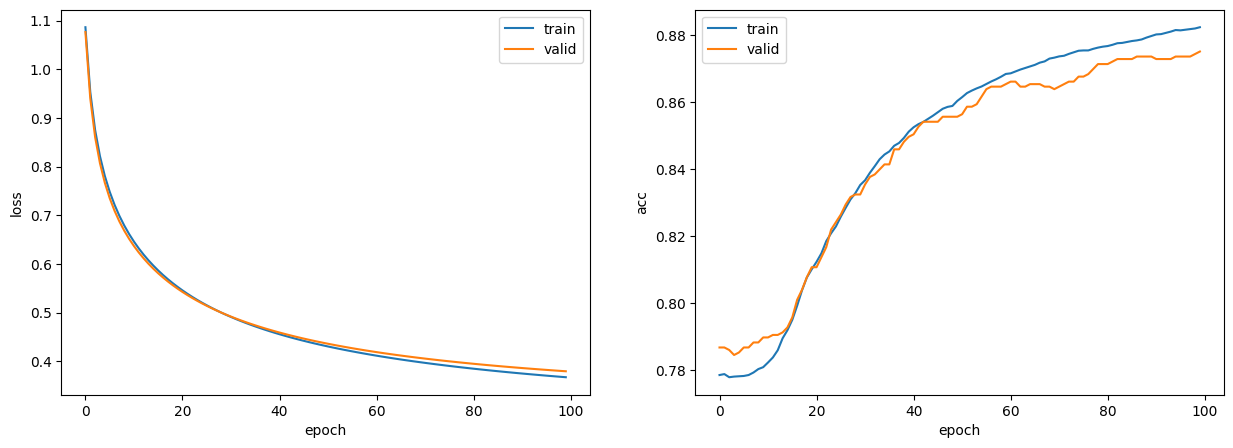

In [140]:
# 表示
import matplotlib.pyplot as plt

train_acc, train_loss = zip(*train_log)
valid_acc, valid_loss = zip(*valid_log)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(train_loss, label='train')
ax[0].plot(valid_loss, label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(train_acc, label='train')
ax[1].plot(valid_acc, label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[1].legend()

plt.show()

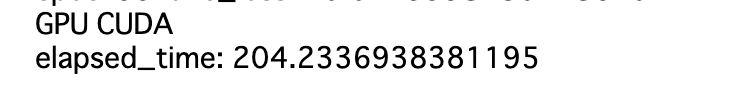

In [156]:
# GPUのかかった時間(GPUのほうが8倍ほど時間がかかっている)
from PIL import Image

im = Image.open('スクリーンショット 2023-10-23 14.47.27.png')
im

<h2 id="79-多層ニューラルネットワーク">79. 多層ニューラルネットワーク</h2>
<p>問題78のコードを改変し，バイアス項の導入や多層化など，ニューラルネットワークの形状を変更しながら，高性能なカテゴリ分類器を構築せよ．</p>


In [152]:
class Net(nn.Module):
    def __init__(self, n_features, hid_1, hid_2, n_labels):
        super().__init__() # 親クラスの nn.Module の初期化
        self.func = nn.Sequential(
            nn.Linear(n_features, hid_1, bias=True), # 線形層
            nn.Linear(hid_1, hid_2, bias=True), # 線形層
            nn.Linear(hid_2, n_labels, bias=True) # 線形層
        )
        torch.manual_seed(0)

    def forward(self, x):
        return self.func(x)

In [153]:
# 時間計測
start_time = time()
model = Net(300, 75, 20, 4)
# batch_sizeは1が最も正答率が高くなった
train_log, valid_log = train(model, batch_size=1, total_epochs=100)
elapsed_time = time() - start_time

if is_available():
    print('GPU CUDA')
else:
    print('CPU')
print(f"elapsed_time: {elapsed_time}")

batch_size: 1
epoch0: ave_loss = 0.6052465960413158
epoch1: ave_loss = 0.33778431070754955
epoch2: ave_loss = 0.2962694406681834
epoch3: ave_loss = 0.28162047641014193
epoch4: ave_loss = 0.2730319033467169
epoch5: ave_loss = 0.2672343254281707
epoch6: ave_loss = 0.26296735889639816
epoch7: ave_loss = 0.25964471226241603
epoch8: ave_loss = 0.2569613913373779
epoch9: ave_loss = 0.2547371229906022
epoch10: ave_loss = 0.2528562803181985
epoch11: ave_loss = 0.2512404161257999
epoch12: ave_loss = 0.2498340355495202
epoch13: ave_loss = 0.24859664151773436
epoch14: ave_loss = 0.24749780362618
epoch15: ave_loss = 0.24651422519327149
epoch16: ave_loss = 0.2456276360987967
epoch17: ave_loss = 0.2448235418601737
epoch18: ave_loss = 0.2440902865101587
epoch19: ave_loss = 0.24341832910983902
epoch20: ave_loss = 0.24279982057782595
epoch21: ave_loss = 0.2422282122925462
epoch22: ave_loss = 0.2416980368359529
epoch23: ave_loss = 0.24120463244038676
epoch24: ave_loss = 0.24074404830800591
epoch25: ave_

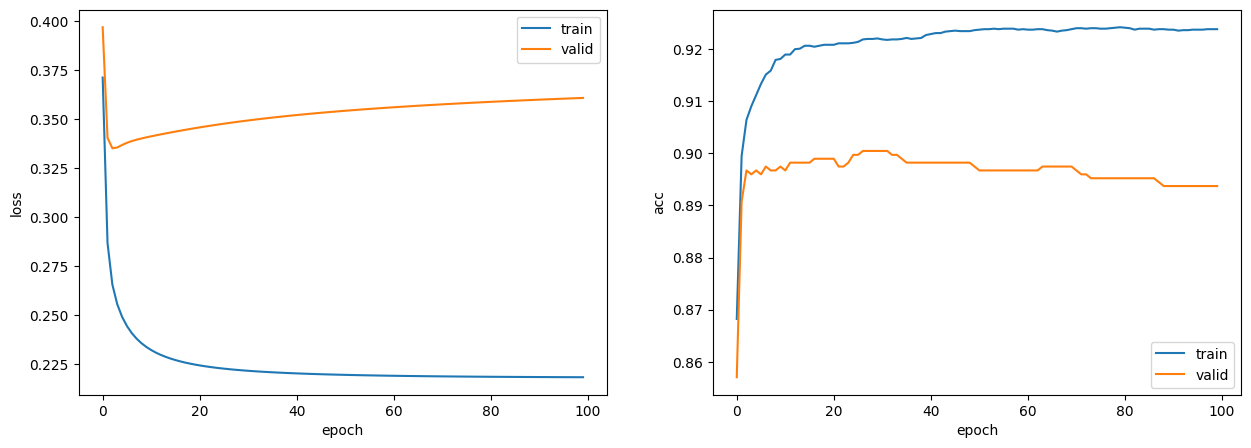

In [154]:
# 表示
import matplotlib.pyplot as plt

train_acc, train_loss = zip(*train_log)
valid_acc, valid_loss = zip(*valid_log)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(train_loss, label='train')
ax[0].plot(valid_loss, label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()

ax[1].plot(train_acc, label='train')
ax[1].plot(valid_acc, label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[1].legend()

plt.savefig('')
plt.show()